In [2]:
import os
import json
import csv
import glob
import datetime
import requests
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

In [9]:
### Atlanta Pre-Work ###
# Combine the multiple file for Atlanta into one CSV
path = r'C:\Users\patri\Google Drive\Group Project\GroupPoject01Files\patrick_stuff\atl'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
atl_complete_df = pd.concat(df_from_each_file, ignore_index=True, sort=True)

# Changing time format and capitalization of UCR
atl_complete_df[['Year', 'Month', 'Day']] = atl_complete_df['Report Date'].astype(str).str.split("-",expand=True,)
atl_complete_df = atl_complete_df.apply(lambda x: x.str.title() if x.dtype == "object" else x) 

# Shape the combined CSV into a more manageable DataFrame
atl_sorted_df = atl_complete_df.loc[:, ["UCR Literal", "UCR #", "Month", "Day", "Year", "Latitude", "Longitude"]]

# Rename a few things
atl_df = atl_sorted_df.rename(columns={"UCR Literal" : "Crime", "UCR #" : "UCR Code"})

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  


In [22]:
# atl_df.to_csv("patrick_stuff/atl.csv", index=False)
# mn_df.to_csv("patrick_stuff/mn.csv", index=False)
atl_df.head()

,Crime,UCR Code,Month,Day,Year,Latitude,Longitude
0,Larceny-Non Vehicle,630,01,01,2009,33.68845,-84.49328
1,Larceny-Non Vehicle,630,01,01,2009,33.75320,-84.39201
2,Larceny-Non Vehicle,630,01,01,2009,33.75735,-84.50282
3,Larceny-Non Vehicle,630,01,01,2009,33.84676,-84.36212
4,Larceny-Non Vehicle,630,01,01,2009,33.68677,-84.49773


In [28]:
atl_backup_df = atl_df
atl_df.Crime.value_counts()

Larceny-From Vehicle    101948
Larceny-Non Vehicle      79631
Burglary-Residence       48927
Auto Theft               46078
Agg Assault              24374
Robbery-Pedestrian       16927
Burglary-Nonres          10697
Robbery-Commercial        2263
Robbery-Residence         2194
Homicide                   947
Manslaughter                17
Name: Crime, dtype: int64

In [124]:
atl_combined_crime = atl_df.replace({
    "Larceny-From Vehicle" : "Theft",
    "Larceny-Non Vehicle" : "Theft",
    "Burglary-Residence": "Burglary",
    "Burglary-Nonres": "Burglary",
    "Robbery-Pedestrian" : "Robbery",
    "Robbery-Commercial" : "Robbery",
    "Robbery-Residence" : "Robbery",
    "Agg Assault" : "Aggrivated Assault",
    "Auto Theft" : "Grand Theft Auto"})
atl_combined_crime.Crime.value_counts()
atl_df = atl_combined_crime
atl_df.Crime.value_counts()

Theft                 181579
Burglary               59624
Grand Theft Auto       46078
Aggrivated Assault     24374
Robbery                21384
Homicide                 947
Manslaughter              17
Name: Crime, dtype: int64

In [94]:
atl_short_df = atl_df.loc[:,["Crime", "Year"]]

In [95]:

atl_years = atl_short_df['Year'].unique()
atl_theft = atl_short_df[atl_short_df['Crime'] == 'Theft'].groupby('Year')['Crime'].count()
atl_burglary = atl_short_df[atl_short_df['Crime'] == 'Burglary'].groupby('Year')['Crime'].count()
atl_auto = atl_short_df[atl_short_df['Crime'] == 'Grand Theft Auto'].groupby('Year')['Crime'].count()
atl_robbery = atl_short_df[atl_short_df['Crime'] == 'Robbery'].groupby('Year')['Crime'].count()
atl_aassault = atl_short_df[atl_short_df['Crime'] == 'Aggrivated Assault'].groupby('Year')['Crime'].count()
atl_homicide = atl_short_df[atl_short_df['Crime'] == 'Homicide'].groupby('Year')['Crime'].count()
atl_manslaughter = atl_short_df[atl_short_df['Crime'] == 'Manslaughter'].groupby('Year')['Crime'].count()

atl_crime_df = pd.DataFrame({
    "Theft" : atl_theft,
    "Burglary" : atl_burglary,
    "Grand Theft Auto" : atl_auto,
    "Robbery" : atl_robbery,
    "Aggrivated Assault" : atl_aassault,
    "Homicide" : atl_homicide,
    "Manslaughter" : atl_manslaughter
})

atl_crime_df.fillna(0).style.format("{:,}")

,Theft,Burglary,Grand Theft Auto,Robbery,Aggrivated Assault,Homicide,Manslaughter
2009,"19,288","9,083","5,647","2,683","2,616",78,1.0
2010,"17,674","7,994","4,975","2,158","2,610",89,2.0
2011,"17,323","7,396","5,219","2,313","2,536",84,4.0
2012,"17,286","6,157","5,098","2,262","2,520",82,3.0
2013,"17,270","5,962","4,483","2,368","2,275",81,1.0
2014,"16,813","5,490","4,133","2,368","2,240",88,1.0
2015,"16,643","4,791","4,250","2,159","2,157",87,2.0
2016,"16,550","4,397","3,848","1,916","2,196",115,0.0
2017,"16,274","3,398","3,202","1,417","2,035",84,1.0
2018,"16,421","3,019","3,222","1,051","1,824",90,1.0


In [155]:
# x_axis = atl_years
# theft_incidents = atl_theft 
# burglary_incidents = atl_burglary
# auto_incidents = atl_auto
# robbery_incidents = atl_robbery
# assault_incidents = atl_aassault
# homicide_incidents = atl_homicide

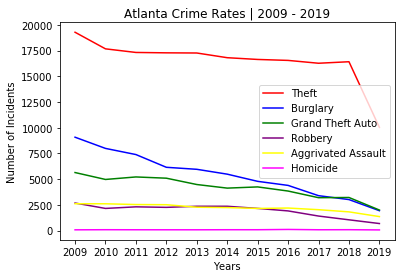

In [156]:
# Atlanta by year graph
x_axis = atl_years
theft, = plt.plot(x_axis, atl_theft , color="red", label="Theft")
burglary, = plt.plot(x_axis, atl_burglary, color="blue", label="Burglary")
auto, = plt.plot(x_axis, atl_auto, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, atl_robbery, color="purple", label="Robbery")
assault, = plt.plot(x_axis, atl_aassault, color="yellow", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, atl_homicide, color="magenta", label="Homicide")

#Add labels to graph
plt.title("Atlanta Crime Rates | 2009 - 2019")
plt.xlabel("Years")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc="best")

In [159]:
### Minneapolis Work ###
# Combine the multiple file for Atlanta into one CSV
path = r'C:\Users\patri\Google Drive\Group Project\GroupPoject01Files\patrick_stuff\mn'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
mn_complete_df = pd.concat(df_from_each_file, ignore_index=True, sort=True)

# Shape the combined CSV into a more manageable DataFrame
mn_complete_df[['Year', 'Month', 'Day']] = mn_complete_df['ReportedDate'].astype(str).str.split("-",expand=True,)
mn_complete_df['Day'] = mn_complete_df['Day'].str.split('T').str[0]

# Shape the combined CSV into a more manageable DataFrame
mn_sorted_df = mn_complete_df.loc[:, ["Description", "UCRCode", "Month", "Day", "Year", "X", "Y"]]

# Rename a few things
mn_df = mn_sorted_df.rename(columns={"Description" : "Crime", "UCRCode" : "UCR Code", "X" : "Latitude", "Y" : "Longitude"})

In [160]:
mn_backup_df = mn_df
mn_df.Crime.value_counts()

Other Theft                       43460
Theft From Motr Vehc              26122
Burglary Of Dwelling              25993
Motor Vehicle Theft               12703
Shoplifting                        6406
Robbery Per Agg                    6069
Robbery Of Person                  5254
Burglary Of Business               5129
Asslt W/dngrs Weapon               4556
Bike Theft                         4494
Theft From Person                  2635
Crim Sex Cond-rape                 2079
Domestic Assault/Strangulation     1945
2nd Deg Domes Aslt                 1779
Theft By Swindle                   1644
Aslt-sgnfcnt Bdly Hm               1342
Robbery Of Business                 846
Theft-motr Veh Parts                823
Arson                               820
Aslt-police/emerg P                 714
Theft From Building                 656
3rd Deg Domes Aslt                  466
Murder (general)                    184
Aslt-great Bodily Hm                158
Other Vehicle Theft                 150


In [161]:
mn_combined_crime = mn_df.replace({
    "Other Theft" : "Theft",
    "Theft From Motr Vehc" : "Theft",
    "Theft From Person" : "Theft",
    "Bike Theft" : "Theft",
    "Shoplifting" : "Theft",
    "Other Vehicle Theft" : "Theft",
    "Theft By Swindle" : "Theft",
    "Pocket-picking" : "Theft",
    "On-line Theft" : "Theft",
    "Theft From Building" : "Theft",
    "Theft-motr Veh Parts" : "Theft",
    "Scrapping-Recycling Theft" : "Theft",
    "Theft/coinop Device" : "Theft",
    "Theft By Computer" : "Theft",
     "Gas Station Driv-off" : "Theft",
    "Burglary Of Business" : "Burglary",
    "Burglary Of Dwelling" : "Burglary",
    "Robbery Of Business" : "Burglary",
    "Robbery-Pedestrian" : "Robbery",
    "Robbery-Commercial" : "Robbery",
    "Robbery Of Person" : "Robbery",
    "Robbery Per Agg" : "Aggrivated Assault",
    "Aslt-sgnfcnt Bdly Hm": "Aggrivated Assault",
    "Aslt-great Bodily Hm" : "Aggrivated Assault",
    "Asslt W/dngrs Weapon" : "Aggrivated Assault",
    "Aslt-police/emerg P" : "Aggrivated Assault",
    "Motor Vehicle Theft" : "Grand Theft Auto",
    "Crim Sex Cond-rape" : "Sex Offense",
    "Domestic Assault/Strangulation" : "Domestic Assault",
    "1st Deg Domes Asslt" : "Domestic Assault",
    "2nd Deg Domes Aslt" : "Domestic Assault",
    "3rd Deg Domes Aslt" : "Domestic Assault", 
    "Murder (general)" : "Homicide"    
})
mn_combined_crime.Year.value_counts()

2017    22085
2012    21934
2013    21857
2011    21627
2014    21532
2010    20339
2015    19998
2018     7350
Name: Year, dtype: int64

In [162]:
mn_df = mn_combined_crime
mn_short_df = mn_df.loc[:,["Crime", "Year"]]
mn_short_df.Year.value_counts()

2017    22085
2012    21934
2013    21857
2011    21627
2014    21532
2010    20339
2015    19998
2018     7350
Name: Year, dtype: int64

In [163]:
mn_years = mn_short_df['Year'].unique()
mn_theft = mn_short_df[mn_short_df['Crime'] == 'Theft'].groupby('Year')['Crime'].count()
mn_burglary = mn_short_df[mn_short_df['Crime'] == 'Burglary'].groupby('Year')['Crime'].count()
mn_auto = mn_short_df[mn_short_df['Crime'] == 'Grand Theft Auto'].groupby('Year')['Crime'].count()
mn_robbery = mn_short_df[mn_short_df['Crime'] == 'Robbery'].groupby('Year')['Crime'].count()
mn_aassault = mn_short_df[mn_short_df['Crime'] == 'Aggrivated Assault'].groupby('Year')['Crime'].count()
mn_homicide = mn_short_df[mn_short_df['Crime'] == 'Homicide'].groupby('Year')['Crime'].count()
mn_domestic = mn_short_df[mn_short_df['Crime'] == 'Domestic Assault'].groupby('Year')['Crime'].count()
mn_sex = mn_short_df[mn_short_df['Crime'] == 'Sex Offense'].groupby('Year')['Crime'].count()
mn_arson = mn_short_df[mn_short_df['Crime'] == 'Arson'].groupby('Year')['Crime'].count()

mn_crime_df = pd.DataFrame({
    "Theft": mn_theft,
    "Burglary": mn_burglary,
    "Grand Theft Auto": mn_auto,
    "Robbery": mn_robbery,
    "Aggrivated Assault": mn_aassault,
    "Homicide": mn_homicide,
    "Domestic Assault": mn_domestic,
    "Sex Offense" : mn_sex,
    "Arson" : mn_arson
})

mn_crime_df.fillna(0).style.format("{:,}")

,Theft,Burglary,Grand Theft Auto,Robbery,Aggrivated Assault,Homicide,Domestic Assault,Sex Offense,Arson
Year,,,,,,,,,
2010,"10,582","4,803","1,773",674,"1,598",24,498,273,113
2011,"11,581","5,147","1,695",732,"1,530",22,547,241,132
2012,"12,053","4,733","1,747",808,"1,658",21,520,283,111
2013,"12,295","4,619","1,489",773,"1,704",29,570,260,115
2014,"12,526","4,146","1,417",683,"1,814",26,547,263,109
2015,"11,200","3,588","1,579",737,"1,894",29,578,285,105
2017,"12,264","3,845","2,127",688,"1,996",24,687,342,112
2018,"4,155","1,087",876,159,645,9,263,132,23


In [165]:
# x_axis = range(2010, 2019)
# theft_incidents = atl_theft 
# burglary_incidents = atl_burglary
# auto_incidents = atl_auto
# robbery_incidents = atl_robbery
# assault_incidents = atl_aassault
# homicide_incidents = atl_homicide
mn_years

array(['2010', '2011', '2012', '2013', '2014', '2015', '2017', '2018'],
      dtype=object)

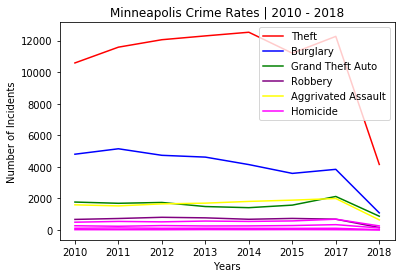

In [166]:
# Minneapolis by year graph
x_axis = mn_years
theft, = plt.plot(x_axis, mn_theft, color="red", label="Theft")
burglary, = plt.plot(x_axis, mn_burglary, color="blue", label="Burglary")
auto, = plt.plot(x_axis, mn_auto, color="green", label="Grand Theft Auto")
robbery, = plt.plot(x_axis, mn_robbery, color="purple", label="Robbery")
assault, = plt.plot(x_axis, mn_aassault, color="yellow", label="Aggrivated Assault")
homicide, = plt.plot(x_axis, mn_homicide, color="magenta", label="Homicide")
domestic, = plt.plot(x_axis, mn_domestic, color="magenta", label="Domestic Assault")
sex, = plt.plot(x_axis, mn_sex, color="magenta", label="Sex Offense")
arson, = plt.plot(x_axis, mn_arson, color="magenta", label="Arson")

#Add labels to graph
plt.title("Minneapolis Crime Rates | 2010 - 2018")
plt.xlabel("Years")
plt.ylabel("Number of Incidents")

plt.legend(handles=[theft, burglary, auto, robbery, assault, homicide], loc="best")